In [2]:
import os 
import sys
# get current working directory
os.getcwd()

'c:\\Users\\pnaghs1\\OneDrive - Louisiana State University\\github\\Conductivity_GCN'

In [3]:
import pandas as pd
df = pd.read_csv('modified_data.csv')

In [4]:
df

,CC1=CC=C(C=C1)C(C2=CC=C(C=C2)OC3=CC=C(C=C3)C(CCC(NCC4=CC=[N+](C=C4)C)=O)(C5=CC=C(C=C5)OC)C)=O,0.198,0.802,0.247,1,0.00318
0,CC1=CC=C(C(C2=CC=C(OC3=CC=C(C(C)(CCC(NCC4=CC=[...,0.5020,0.4980,1.008,1,0.006160
1,CC1=CC=C(C(C2=CC=C(OC3=CC=C(C(C)(CCC(NCC4=CC=[...,0.7581,0.2419,3.134,1,0.010260
2,CC1=CC=C(C(C2=CC=C(OC3=CC=C(C(C)(CCC(NCC4=CC=[...,0.9670,0.0330,29.303,1,0.011560
3,COC1=C(C[N+]2=C(CC)N=CC2)C=C(OC3=CC(C[N+]4=C(C...,0.1500,0.8500,0.176,1,0.017000
4,COC1=C(C[N+]2=C(CC)N=CC2)C=C(OC3=CC(C[N+]4=C(C...,0.1000,0.9000,0.111,1,0.028000
...,...,...,...,...,...,...
201,CC(CCC(CCCCCCCCC[N+](C)(C)C)C)CCC1=CC=C(F)C=C1,0.2000,0.8000,0.250,1,0.069760
202,CC(CCC(CCCCCCCCC[N+](C)(C)C)C)CCC1=CC=C([H])C=C1,0.2200,0.7800,0.282,1,0.067835
203,CC1=C(C2=CC=C(OCCCCCN3C4=C(C5=C3C(Br)=CC(C6=CC...,0.5000,0.5000,1.000,1,0.050630
204,CC1=C(C2=CC=C(OCCCCCN3C4=C(C5=C3C(Br)=CC(C6=CC...,0.6000,0.4000,1.500,1,0.071720


In [5]:
# SMILES is in column 0, target (conductivity) is in column 5
from rdkit import Chem
smiles_list = df.iloc[:, 0].astype(str)
target = df.iloc[:, 5].astype(float)

# Convert SMILES to RDKit Mol objects
mols = [Chem.MolFromSmiles(s) for s in smiles_list]
valid_idx = [i for i, mol in enumerate(mols) if mol is not None]

# Filter valid data
mols = [mols[i] for i in valid_idx]
target = target.iloc[valid_idx].reset_index(drop=True)
meta_features = df.iloc[valid_idx, 1:5].reset_index(drop=True).astype(float)


In [6]:
from mordred import Calculator, descriptors
# Compute Mordred descriptors
calc = Calculator(descriptors, ignore_3D=True)
desc_df = calc.pandas(mols)
desc_df = desc_df.dropna(axis=1)  # Remove NaN descriptors

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  3%|▎         | 6/206 [00:02<01:09,  2.89it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  6%|▋         | 13/206 [00:03<00:32,  5.99it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  7%|▋         | 15/206 [00:03<00:23,  8.25it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  7%|▋         | 15/206 [00:04<00:23,  8.25it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 14%|█▎        | 28/206 [00:05<01:12,  2.47it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(ob

 16%|█▌        | 32/206 [00:07<00:37,  4.69it/s]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 69%|██████▉   | 143/206 [00:58<01:08,  1.08s/it]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


 70%|██████▉   | 144/206 [00:58<01:05,  1.06s/it]

c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5
c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\mordred\_matrix_attributes.py:251: RuntimeWarning: invalid value encountered in double_scalars
  s += (eig.vec[i, eig.max] * eig.vec[j, eig.max]) ** -0.5


100%|██████████| 206/206 [01:00<00:00,  3.43it/s]


In [7]:
desc_df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,10.668467,82.640379,599.290434,7.134410,8982,72,234.0,272.0,13.895833,9.930556
1,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,10.668467,82.640379,599.290434,7.134410,8982,72,234.0,272.0,13.895833,9.930556
2,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,10.668467,82.640379,599.290434,7.134410,8982,72,234.0,272.0,13.895833,9.930556
3,49.311853,36.924403,0,8,82.976738,2.46619,4.916976,82.976738,1.317091,5.076807,...,11.033292,120.070215,846.455908,6.995503,18158,102,336.0,400.0,18.083333,14.111111
4,49.311853,36.924403,0,8,82.976738,2.46619,4.916976,82.976738,1.317091,5.076807,...,11.033292,120.070215,846.455908,6.995503,18158,102,336.0,400.0,18.083333,14.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,20.603915,15.469354,0,1,33.643922,2.220725,4.44145,33.643922,1.201569,4.194777,...,9.579625,61.673414,392.368705,5.231583,3077,30,126.0,131.0,10.756944,6.375000
202,19.787419,15.013148,0,1,32.852724,2.182824,4.365649,32.852724,1.216768,4.156475,...,9.480749,60.339561,374.378127,4.991708,2780,28,120.0,124.0,9.895833,6.208333
203,94.101729,53.301766,0,3,149.017764,2.609616,5.219233,149.017764,1.262862,5.704645,...,11.878339,175.692885,1789.456036,8.440830,144989,214,652.0,777.0,41.375,24.694444
204,94.101729,53.301766,0,3,149.017764,2.609616,5.219233,149.017764,1.262862,5.704645,...,11.878339,175.692885,1789.456036,8.440830,144989,214,652.0,777.0,41.375,24.694444


In [8]:
# Combine Mordred and meta features
cy = target

In [9]:
meta_features

,0.198,0.802,0.247,1
0,0.5020,0.4980,1.008,1.0
1,0.7581,0.2419,3.134,1.0
2,0.9670,0.0330,29.303,1.0
3,0.1500,0.8500,0.176,1.0
4,0.1000,0.9000,0.111,1.0
...,...,...,...,...
201,0.2000,0.8000,0.250,1.0
202,0.2200,0.7800,0.282,1.0
203,0.5000,0.5000,1.000,1.0
204,0.6000,0.4000,1.500,1.0


In [10]:
# Assign column names to meta features
meta_features.columns = ['Block A (x)', 'Block B (1-x)', 'Block A/B ratio', 'Polymer type']


In [11]:
# Combine descriptor and meta features
X = pd.concat([desc_df.reset_index(drop=True), meta_features.reset_index(drop=True)], axis=1)


In [12]:
y = df.iloc[:, -1].astype(float).reset_index(drop=True)

In [13]:
X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Block A (x),Block B (1-x),Block A/B ratio,Polymer type
0,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,8982,72,234.0,272.0,13.895833,9.930556,0.5020,0.4980,1.008,1.0
1,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,8982,72,234.0,272.0,13.895833,9.930556,0.7581,0.2419,3.134,1.0
2,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,8982,72,234.0,272.0,13.895833,9.930556,0.9670,0.0330,29.303,1.0
3,49.311853,36.924403,0,8,82.976738,2.46619,4.916976,82.976738,1.317091,5.076807,...,18158,102,336.0,400.0,18.083333,14.111111,0.1500,0.8500,0.176,1.0
4,49.311853,36.924403,0,8,82.976738,2.46619,4.916976,82.976738,1.317091,5.076807,...,18158,102,336.0,400.0,18.083333,14.111111,0.1000,0.9000,0.111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,20.603915,15.469354,0,1,33.643922,2.220725,4.44145,33.643922,1.201569,4.194777,...,3077,30,126.0,131.0,10.756944,6.375000,0.2000,0.8000,0.250,1.0
202,19.787419,15.013148,0,1,32.852724,2.182824,4.365649,32.852724,1.216768,4.156475,...,2780,28,120.0,124.0,9.895833,6.208333,0.2200,0.7800,0.282,1.0
203,94.101729,53.301766,0,3,149.017764,2.609616,5.219233,149.017764,1.262862,5.704645,...,144989,214,652.0,777.0,41.375,24.694444,0.5000,0.5000,1.000,1.0
204,94.101729,53.301766,0,3,149.017764,2.609616,5.219233,149.017764,1.262862,5.704645,...,144989,214,652.0,777.0,41.375,24.694444,0.6000,0.4000,1.500,1.0


In [14]:
y

0      0.006160
1      0.010260
2      0.011560
3      0.017000
4      0.028000
         ...   
201    0.069760
202    0.067835
203    0.050630
204    0.071720
205    0.098730
Name: 0.00318, Length: 206, dtype: float64

In [15]:
# X.columns = range(X.shape[1])

In [16]:
X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Block A (x),Block B (1-x),Block A/B ratio,Polymer type
0,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,8982,72,234.0,272.0,13.895833,9.930556,0.5020,0.4980,1.008,1.0
1,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,8982,72,234.0,272.0,13.895833,9.930556,0.7581,0.2419,3.134,1.0
2,35.040611,23.502736,0,1,58.756497,2.457017,4.914034,58.756497,1.3057,4.727213,...,8982,72,234.0,272.0,13.895833,9.930556,0.9670,0.0330,29.303,1.0
3,49.311853,36.924403,0,8,82.976738,2.46619,4.916976,82.976738,1.317091,5.076807,...,18158,102,336.0,400.0,18.083333,14.111111,0.1500,0.8500,0.176,1.0
4,49.311853,36.924403,0,8,82.976738,2.46619,4.916976,82.976738,1.317091,5.076807,...,18158,102,336.0,400.0,18.083333,14.111111,0.1000,0.9000,0.111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,20.603915,15.469354,0,1,33.643922,2.220725,4.44145,33.643922,1.201569,4.194777,...,3077,30,126.0,131.0,10.756944,6.375000,0.2000,0.8000,0.250,1.0
202,19.787419,15.013148,0,1,32.852724,2.182824,4.365649,32.852724,1.216768,4.156475,...,2780,28,120.0,124.0,9.895833,6.208333,0.2200,0.7800,0.282,1.0
203,94.101729,53.301766,0,3,149.017764,2.609616,5.219233,149.017764,1.262862,5.704645,...,144989,214,652.0,777.0,41.375,24.694444,0.5000,0.5000,1.000,1.0
204,94.101729,53.301766,0,3,149.017764,2.609616,5.219233,149.017764,1.262862,5.704645,...,144989,214,652.0,777.0,41.375,24.694444,0.6000,0.4000,1.500,1.0


In [17]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [18]:

# 3. Coerce all X values to numeric (convert invalid to NaN)
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# 4. Drop columns with any NaNs (bad Mordred descriptors)
X_clean = X_numeric.dropna(axis=1)

# 5. Drop rows with any NaNs (if any still exist)
X_clean = X_clean.dropna(axis=0)

# 6. Align target y
y_clean = y.loc[X_clean.index].reset_index(drop=True)
X_clean = X_clean.reset_index(drop=True)


In [19]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clean,y_clean,test_size=0.2, random_state=2023)

In [20]:
X_train

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,Block A (x),Block B (1-x),Block A/B ratio,Polymer type
102,102.047306,59.054280,0,2,84,84,238,128,0,0,...,7.507071,181691,240,710.0,851.0,26.805556,0.474,0.526,0.9010,1.0
84,19.436632,17.136447,0,1,6,6,72,27,0,0,...,5.185524,2026,40,124.0,140.0,6.472222,0.085,0.915,0.0929,1.0
197,26.219912,19.492766,0,1,18,18,66,33,0,0,...,6.852363,3382,59,182.0,217.0,6.868056,0.500,0.500,1.0000,0.0
26,92.188785,57.795517,0,4,80,80,185,115,0,0,...,8.737554,119604,207,640.0,769.0,24.097222,0.100,0.900,0.1110,1.0
50,25.660211,20.674513,0,2,12,12,84,34,0,0,...,5.599835,4019,51,170.0,192.0,7.527778,0.230,0.770,0.2990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,40.236254,24.497154,0,2,30,30,108,50,0,0,...,6.133879,12187,88,280.0,333.0,10.472222,0.500,0.500,1.0000,1.0
183,33.777558,23.342492,0,1,24,24,83,42,1,0,...,6.847212,6675,78,238.0,289.0,8.784722,0.678,0.332,2.1060,1.0
198,20.940814,17.053442,0,1,12,12,61,27,0,0,...,6.037023,1848,44,142.0,166.0,5.902778,0.340,0.660,0.5150,0.0
25,92.188785,57.795517,0,4,80,80,185,115,0,0,...,8.737554,119604,207,640.0,769.0,24.097222,0.050,0.950,0.0530,1.0


In [21]:
y_clean

0      0.006160
1      0.010260
2      0.011560
3      0.017000
4      0.028000
         ...   
201    0.069760
202    0.067835
203    0.050630
204    0.071720
205    0.098730
Name: 0.00318, Length: 206, dtype: float64

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure all columns are numeric, drop errors
X_cleaned = X.apply(pd.to_numeric, errors='coerce')

# Drop columns with any NaNs caused by parsing issues (e.g., 'np.float' errors)
X_cleaned = X_cleaned.dropna(axis=1)

# Drop rows with NaN in final dataset (optional, if needed)
X_cleaned = X_cleaned.dropna()

# Align y with cleaned X
y_cleaned = y.loc[X_cleaned.index]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=2023)

# Fit the model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Mean Squared Error:", mse)
print("✅ R² Score:", r2)


✅ Mean Squared Error: 0.0004094236379099141
✅ R² Score: 0.7132278152814948


In [22]:
import optuna
from xgboost import XGBRegressor

def objective(trial):
    # Hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1)
    }

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(
        X_cleaned, y_cleaned, test_size=0.2, random_state=2023
    )

    model = XGBRegressor(
        random_state=2023,
        **params
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    return mse


c:\Users\pnaghs1\AppData\Local\anaconda\envs\mordred\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
study = optuna.create_study(direction="minimize", study_name="xgb_opt")
study.optimize(objective, n_trials=50)

print("✅ Best trial:")
print("  MSE:", study.best_value)
print("  Params:", study.best_params)


[I 2025-05-27 10:11:03,603] A new study created in memory with name: xgb_opt
[I 2025-05-27 10:11:06,241] Trial 0 finished with value: 0.0007734358400401211 and parameters: {'n_estimators': 648, 'max_depth': 3, 'learning_rate': 0.1916331404802999, 'subsample': 0.6433977781925432, 'colsample_bytree': 0.9056991335640878, 'reg_alpha': 0.7726249551180341, 'reg_lambda': 0.14260595380743935}. Best is trial 0 with value: 0.0007734358400401211.
[I 2025-05-27 10:11:08,087] Trial 1 finished with value: 0.0006754824125563762 and parameters: {'n_estimators': 413, 'max_depth': 7, 'learning_rate': 0.27778366586543984, 'subsample': 0.9482677248236966, 'colsample_bytree': 0.7782621386167031, 'reg_alpha': 0.6277625977939723, 'reg_lambda': 0.39368015466809547}. Best is trial 1 with value: 0.0006754824125563762.
[I 2025-05-27 10:11:11,811] Trial 2 finished with value: 0.0006422369148843744 and parameters: {'n_estimators': 961, 'max_depth': 3, 'learning_rate': 0.02409705764839383, 'subsample': 0.8562960834

✅ Best trial:
  MSE: 0.00031283682674991916
  Params: {'n_estimators': 619, 'max_depth': 10, 'learning_rate': 0.010268433419397576, 'subsample': 0.6624544948952982, 'colsample_bytree': 0.90650713586864, 'reg_alpha': 0.0019106623803714796, 'reg_lambda': 0.5442761434609553}


**** xgboost


In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Final train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=2023
)

# Train final model
best_model = XGBRegressor(
    n_estimators=619,
    max_depth=10,
    learning_rate=0.010268433419397576,
    subsample=0.6624544948952982,
    colsample_bytree=0.90650713586864,
    reg_alpha=00.0019106623803714796,
    reg_lambda=0.5442761434609553,
    random_state=2023
)

best_model.fit(X_train, y_train)

# Evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Final Evaluation")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


✅ Final Evaluation
Mean Squared Error: 0.00031283682674991916
R² Score: 0.7808800177599456


✅ Final Evaluation
R² Score: 0.7809
RMSE: 0.017687
MAE: 0.013892
MSE: 0.00031284


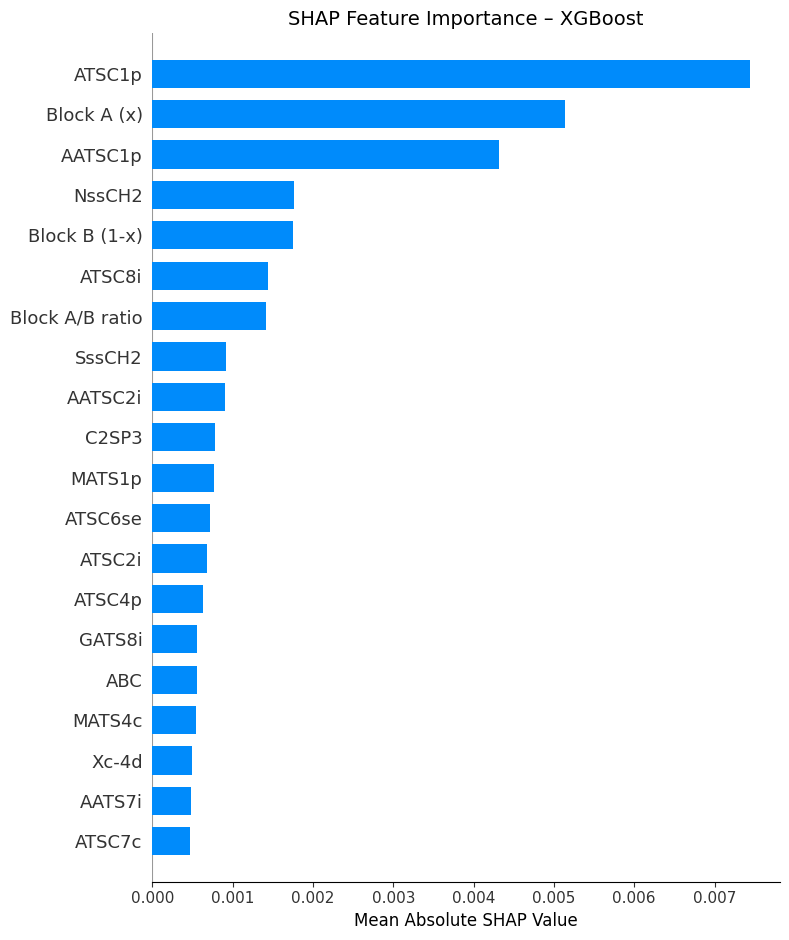

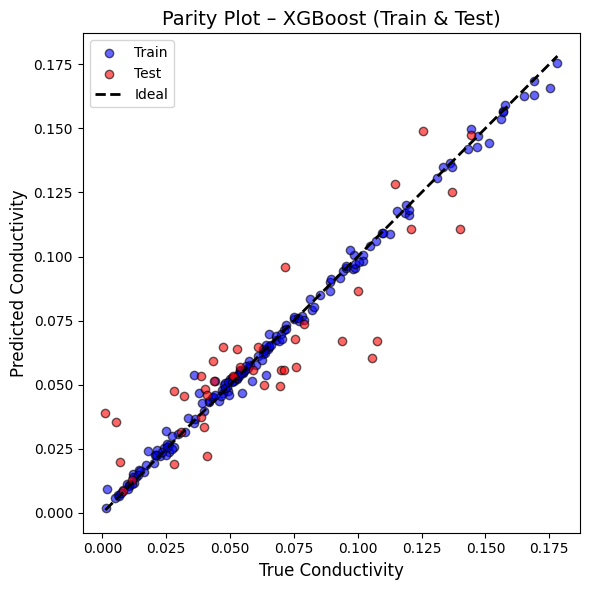

In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Data split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=2023
)

# ----------------------------
# Model training
# ----------------------------
best_model = XGBRegressor(
    n_estimators=619,
    max_depth=10,
    learning_rate=0.010268433419397576,
    subsample=0.6624544948952982,
    colsample_bytree=0.90650713586864,
    reg_alpha=0.0019106623803714796,
    reg_lambda=0.5442761434609553,
    random_state=2023
)

best_model.fit(X_train, y_train)

# ----------------------------
# Predictions and evaluation
# ----------------------------
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Final Evaluation")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"MSE: {mse:.8f}")

# ----------------------------
# SHAP summary bar plot with custom x-axis label
# ----------------------------
X_test_numeric = X_test.astype(float)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_numeric)

# Generate SHAP bar plot without auto-show
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", max_display=20, show=False)

# Customize x-axis label and title
plt.xlabel("Mean Absolute SHAP Value", fontsize=12)
plt.title("SHAP Feature Importance – XGBoost", fontsize=14)
plt.tight_layout()
plt.show()

# Parity plot (Train + Test)
# ----------------------------
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train', color='blue', edgecolor='k')
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Test', color='red', edgecolor='k')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'k--', linewidth=2, label='Ideal')

plt.xlabel("True Conductivity", fontsize=12)
plt.ylabel("Predicted Conductivity", fontsize=12)
plt.title("Parity Plot – XGBoost (Train & Test)", fontsize=14)
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200, random_state=2023)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.0003843405166510659
R²: 0.730796760542398


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split again if not already done
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100,300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 2023
    }

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Run the study
study = optuna.create_study(direction="minimize", study_name="rf_regressor_opt")
study.optimize(objective, n_trials=50, timeout=600)

# Print results
print("✅ Best trial:")
print("  MSE:", study.best_value)
print("  Params:", study.best_params)

# Re-train model with best parameters
best_rf_model = RandomForestRegressor(**study.best_params)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Final Evaluation with Best Parameters:")
print(f"Mean Squared Error: {mse:.10f}")
print(f"R² Score: {r2:.5f}")


[I 2025-05-27 14:40:58,415] A new study created in memory with name: rf_regressor_opt
[I 2025-05-27 14:40:58,540] Trial 0 finished with value: 0.0007266277151371577 and parameters: {'n_estimators': 149, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.0007266277151371577.
[I 2025-05-27 14:40:58,944] Trial 1 finished with value: 0.0005427411589078755 and parameters: {'n_estimators': 218, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.0005427411589078755.
[I 2025-05-27 14:40:59,245] Trial 2 finished with value: 0.0005164058125105007 and parameters: {'n_estimators': 116, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.0005164058125105007.
[I 2025-05-27 14:40:59,634] Trial 3 finished with value: 0.0005529710877535161 and 

✅ Best trial:
  MSE: 0.0003790406885922389
  Params: {'n_estimators': 158, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}

✅ Final Evaluation with Best Parameters:
Mean Squared Error: 0.0003881909
R² Score: 0.72810


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and train the optimized model
best_rf_model = RandomForestRegressor(
    n_estimators=860,
    max_depth=16,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=True,
    random_state=2023
)

# Train on training set
best_rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Final Evaluation with Best Parameters:")
print(f"Mean Squared Error: {mse:.10f}")
print(f"R² Score: {r2:.5f}")


✅ Final Evaluation with Best Parameters:
Mean Squared Error: 0.0004078837
R² Score: 0.71431


✅ Final Evaluation with Best Parameters:
R² Score: 0.7143
RMSE: 0.020196
MAE: 0.016086
MSE: 0.0004078837


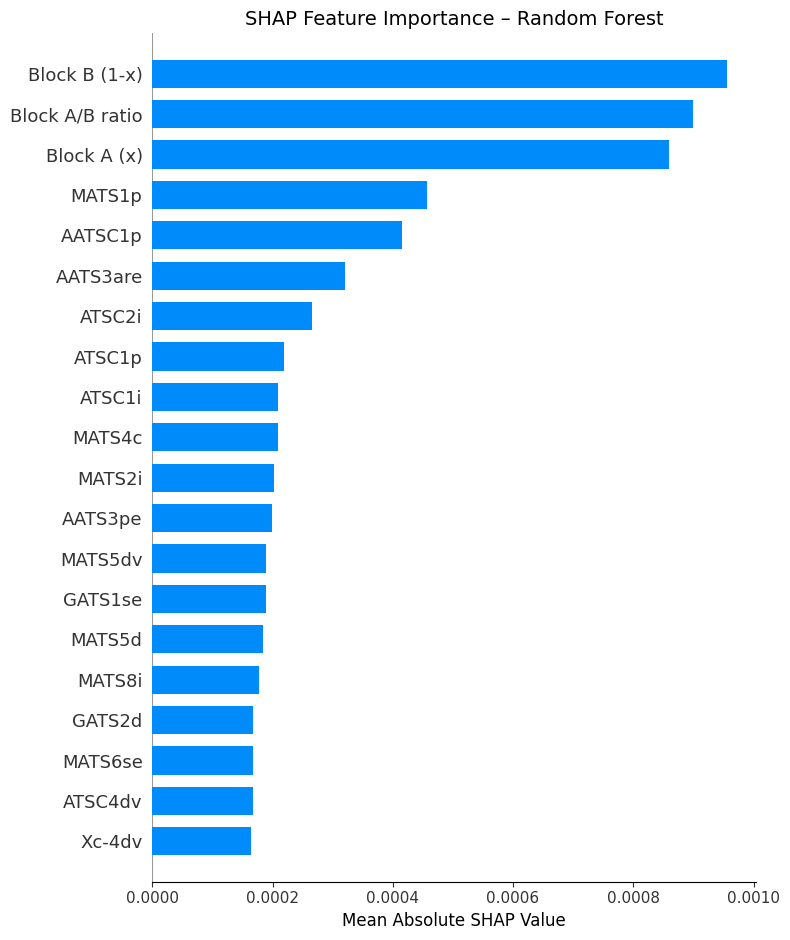

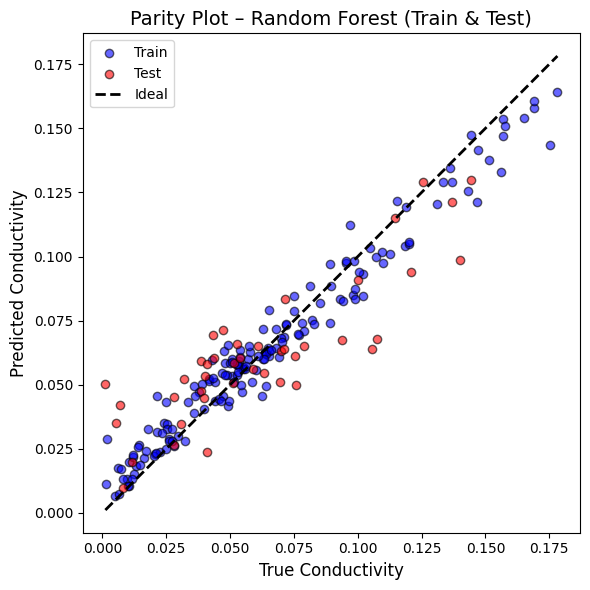

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Data split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=2023
)

# ----------------------------
# Model training
# ----------------------------
best_rf_model = RandomForestRegressor(
    n_estimators=860,
    max_depth=16,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=True,
    random_state=2023
)

best_rf_model.fit(X_train, y_train)

# ----------------------------
# Predictions and evaluation
# ----------------------------
y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Final Evaluation with Best Parameters:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"MSE: {mse:.10f}")

# ----------------------------
# SHAP summary bar plot with custom x-axis label
# ----------------------------
X_test_numeric = X_test.astype(float)
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_numeric)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", max_display=20, show=False)
plt.xlabel("Mean Absolute SHAP Value", fontsize=12)
plt.title("SHAP Feature Importance – Random Forest", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# Parity plot (Train + Test)
# ----------------------------
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train', color='blue', edgecolor='k')
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Test', color='red', edgecolor='k')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'k--', linewidth=2, label='Ideal')

plt.xlabel("True Conductivity", fontsize=12)
plt.ylabel("Predicted Conductivity", fontsize=12)
plt.title("Parity Plot – Random Forest (Train & Test)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [156]:
import optuna
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split your final X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "random_seed": 2023,
        "loss_function": "RMSE"
    }

    train_pool = Pool(X_train, y_train)
    val_pool = Pool(X_test, y_test)

    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=val_pool, use_best_model=True)

    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse

study = optuna.create_study(direction="minimize", study_name="catboost_opt")
study.optimize(objective, n_trials=50)

print("✅ Best trial:")
print("  MSE:", study.best_value)
print("  Params:", study.best_params)


[I 2025-05-21 15:13:27,308] A new study created in memory with name: catboost_opt
[I 2025-05-21 15:14:24,887] Trial 0 finished with value: 0.0003175573166203465 and parameters: {'iterations': 558, 'depth': 9, 'learning_rate': 0.05432859895039977, 'l2_leaf_reg': 5.071847481037929, 'bagging_temperature': 0.9005073854305587, 'random_strength': 9.178021224248107e-06, 'border_count': 69}. Best is trial 0 with value: 0.0003175573166203465.
[I 2025-05-21 15:14:43,426] Trial 1 finished with value: 0.00031172459198635256 and parameters: {'iterations': 472, 'depth': 7, 'learning_rate': 0.07645449020250852, 'l2_leaf_reg': 8.6646866978571, 'bagging_temperature': 0.9586035858601689, 'random_strength': 9.012179733933257e-07, 'border_count': 214}. Best is trial 1 with value: 0.00031172459198635256.
[I 2025-05-21 15:15:37,335] Trial 2 finished with value: 0.0003176977900780147 and parameters: {'iterations': 750, 'depth': 8, 'learning_rate': 0.02853240639989342, 'l2_leaf_reg': 6.73975570520124, 'baggin

✅ Best trial:
  MSE: 0.0002607274362954977
  Params: {'iterations': 229, 'depth': 4, 'learning_rate': 0.196244314265865, 'l2_leaf_reg': 8.338331694646913, 'bagging_temperature': 0.18181780193997027, 'random_strength': 0.23784756123502626, 'border_count': 88}


In [19]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split your final X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
# Define the best model from Optuna tuning
best_catboost_model = CatBoostRegressor(
    iterations=229,
    depth=4,
    learning_rate=0.196244314265865,
    l2_leaf_reg=8.338331694646913,
    bagging_temperature=0.18181780193997027,
    random_strength=0.23784756123502626,
    border_count=88,
    verbose=0  # Suppress training logs
)

# Fit the model
best_catboost_model.fit(X_train, y_train)

# Predict
y_pred = best_catboost_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ CatBoost - Best Trial Performance")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


✅ CatBoost - Best Trial Performance
Mean Squared Error: 0.0002768545066467308
R² Score: 0.8060830778468241


✅ CatBoost - Best Trial Performance
R² Score: 0.8061
RMSE: 0.016639
MAE: 0.013205
MSE: 0.0002768545


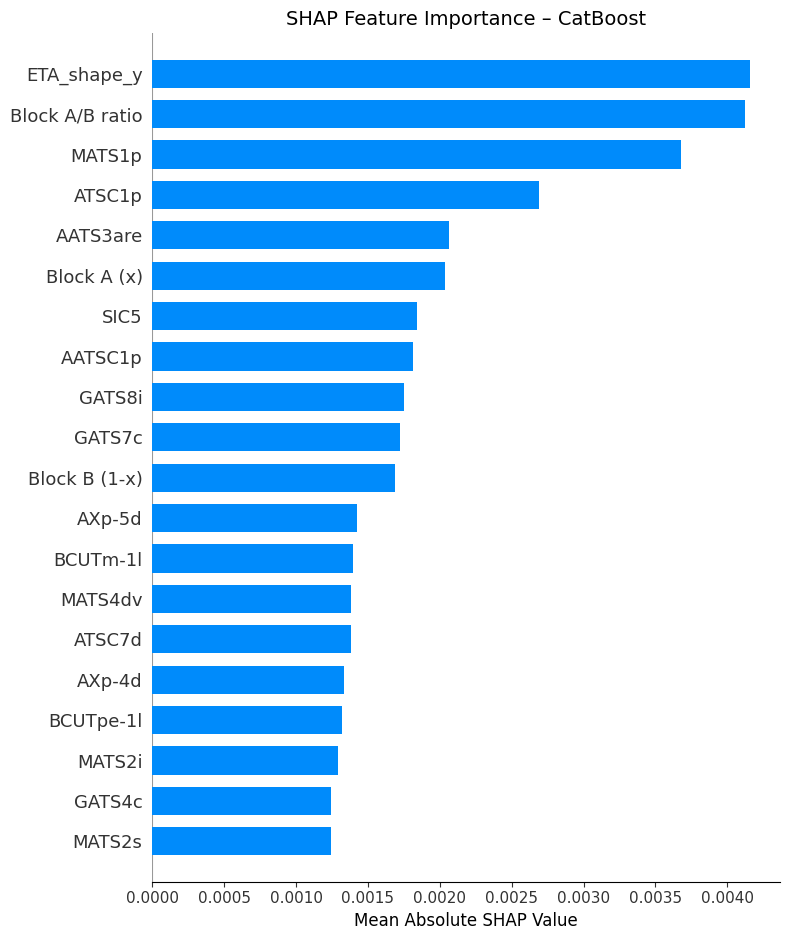

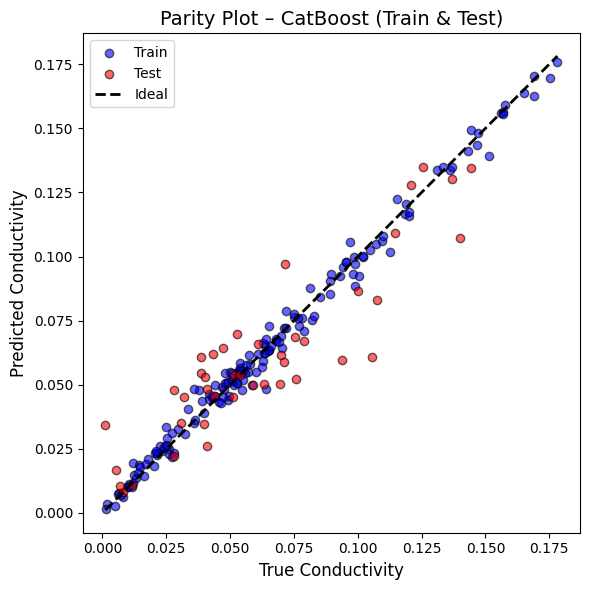

In [44]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Data split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# ----------------------------
# Model training
# ----------------------------
best_catboost_model = CatBoostRegressor(
    iterations=229,
    depth=4,
    learning_rate=0.196244314265865,
    l2_leaf_reg=8.338331694646913,
    bagging_temperature=0.18181780193997027,
    random_strength=0.23784756123502626,
    border_count=88,
    verbose=0  # Suppress training logs
)

best_catboost_model.fit(X_train, y_train)

# ----------------------------
# Predictions and evaluation
# ----------------------------
y_pred = best_catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ CatBoost - Best Trial Performance")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"MSE: {mse:.10f}")

# ----------------------------
# SHAP summary bar plot with custom x-axis label
# ----------------------------
# Use CatBoost's built-in SHAP with Pool
X_test_pool = Pool(X_test, label=y_test)
shap_values = best_catboost_model.get_feature_importance(X_test_pool, type='ShapValues')

# Remove the last column (it's the expected value)
shap_values = shap_values[:, :-1]

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20, show=False)
plt.xlabel("Mean Absolute SHAP Value", fontsize=12)
plt.title("SHAP Feature Importance – CatBoost", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# Parity plot (Train + Test)
# ----------------------------
y_train_pred = best_catboost_model.predict(X_train)
y_test_pred = best_catboost_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Train', color='blue', edgecolor='k')
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Test', color='red', edgecolor='k')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'k--', linewidth=2, label='Ideal')

plt.xlabel("True Conductivity", fontsize=12)
plt.ylabel("Predicted Conductivity", fontsize=12)
plt.title("Parity Plot – CatBoost (Train & Test)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


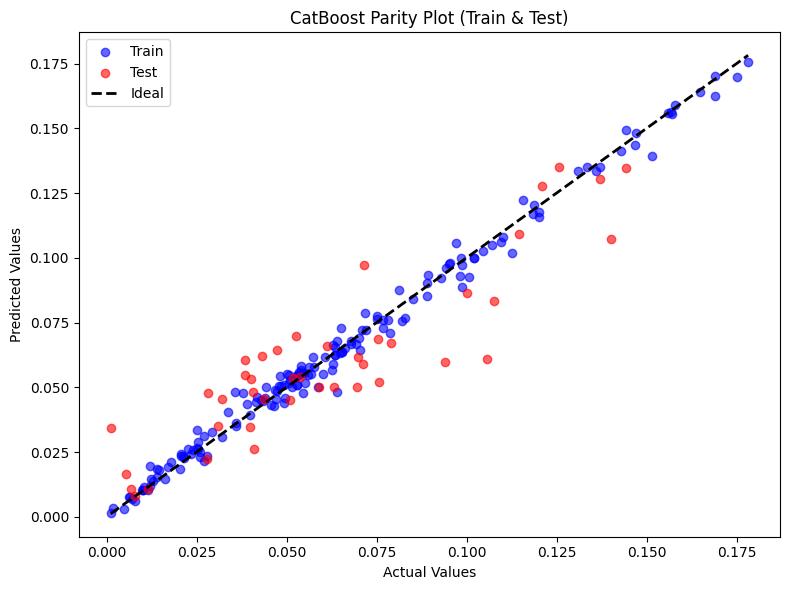

In [21]:
import matplotlib.pyplot as plt

# Predict on both train and test data
y_train_pred = best_catboost_model.predict(X_train)
y_test_pred = best_catboost_model.predict(X_test)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Train')
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6, label='Test')

# Plot y=x line for reference
min_val = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CatBoost Parity Plot (Train & Test)')
plt.legend()
plt.tight_layout()
plt.show()


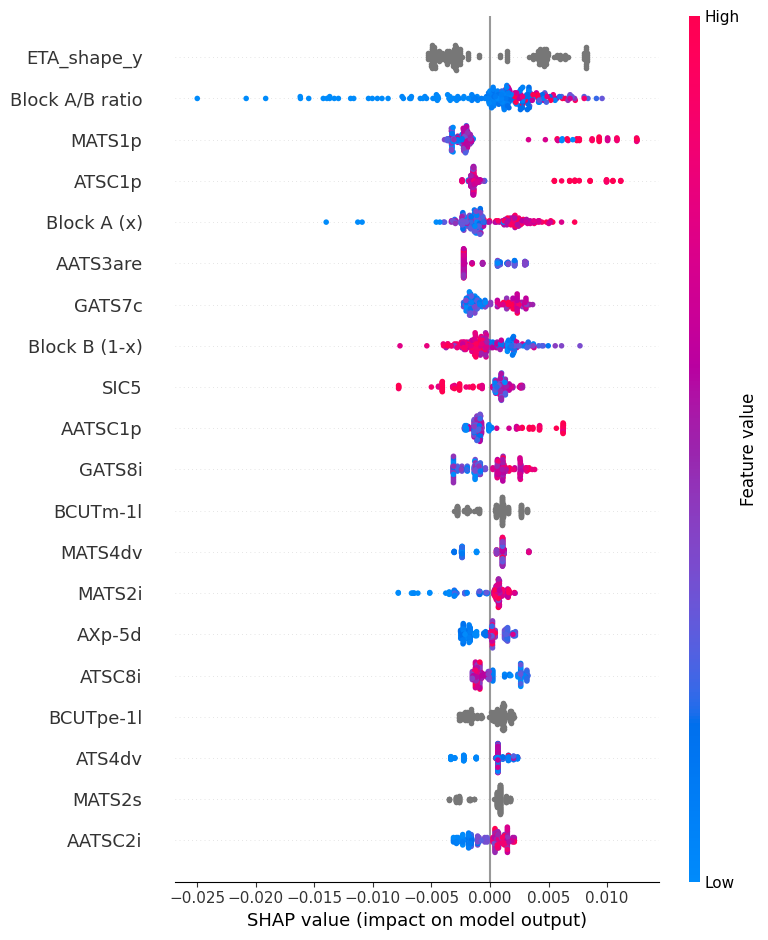

In [51]:
import shap
# 5. SHAP Explainer
explainer = shap.Explainer(best_catboost_model)
shap_values = explainer(X_clean)

# 6. SHAP Summary Plot
shap.summary_plot(shap_values, X_clean)


In [ ]:
study = optuna.create_study(direction="minimize", study_name="xgb_opt")
study.optimize(objective, n_trials=50)

print("✅ Best trial:")
print("  MSE:", study.best_value)
print("  Params:", study.best_params)


[I 2025-05-27 10:11:03,603] A new study created in memory with name: xgb_opt
[I 2025-05-27 10:11:06,241] Trial 0 finished with value: 0.0007734358400401211 and parameters: {'n_estimators': 648, 'max_depth': 3, 'learning_rate': 0.1916331404802999, 'subsample': 0.6433977781925432, 'colsample_bytree': 0.9056991335640878, 'reg_alpha': 0.7726249551180341, 'reg_lambda': 0.14260595380743935}. Best is trial 0 with value: 0.0007734358400401211.
[I 2025-05-27 10:11:08,087] Trial 1 finished with value: 0.0006754824125563762 and parameters: {'n_estimators': 413, 'max_depth': 7, 'learning_rate': 0.27778366586543984, 'subsample': 0.9482677248236966, 'colsample_bytree': 0.7782621386167031, 'reg_alpha': 0.6277625977939723, 'reg_lambda': 0.39368015466809547}. Best is trial 1 with value: 0.0006754824125563762.
[I 2025-05-27 10:11:11,811] Trial 2 finished with value: 0.0006422369148843744 and parameters: {'n_estimators': 961, 'max_depth': 3, 'learning_rate': 0.02409705764839383, 'subsample': 0.8562960834

✅ Best trial:
  MSE: 0.00031283682674991916
  Params: {'n_estimators': 619, 'max_depth': 10, 'learning_rate': 0.010268433419397576, 'subsample': 0.6624544948952982, 'colsample_bytree': 0.90650713586864, 'reg_alpha': 0.0019106623803714796, 'reg_lambda': 0.5442761434609553}


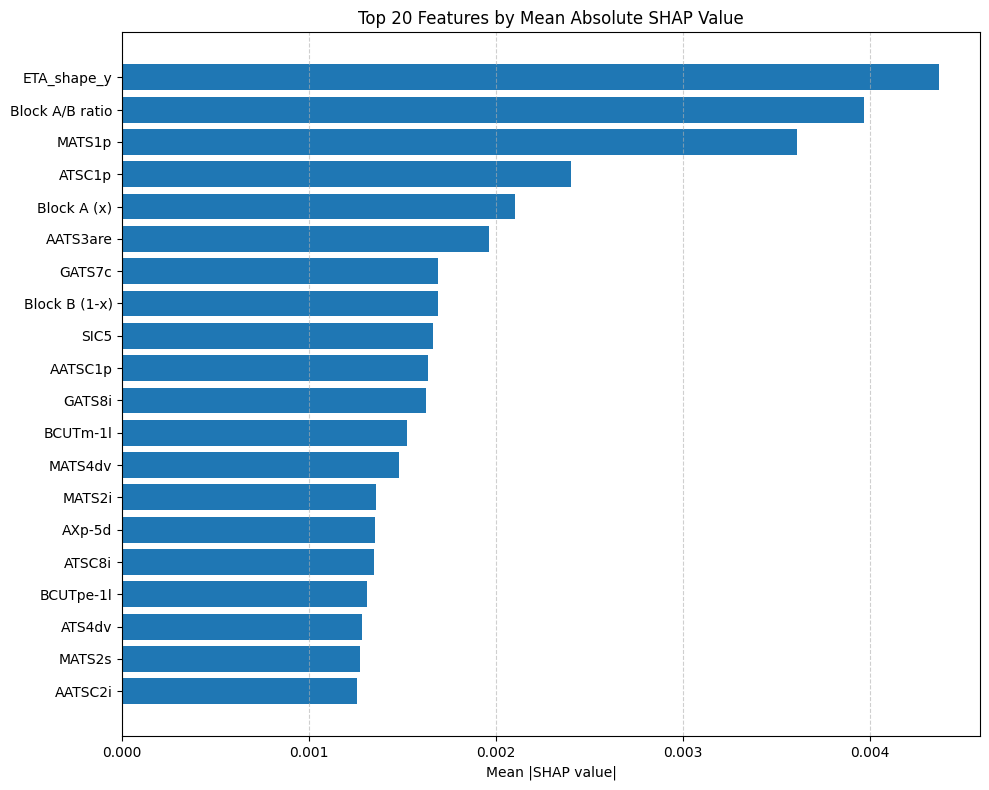

In [56]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute mean absolute SHAP values from the Explanation object
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_names = X_clean.columns

# Create a DataFrame for easier visualization
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP value|': mean_abs_shap
}).sort_values(by='Mean |SHAP value|', ascending=True)

# Plot horizontal bar chart of top 20 features
plt.figure(figsize=(10, 8))
plt.barh(shap_importance['Feature'].tail(20), shap_importance['Mean |SHAP value|'].tail(20))
plt.xlabel('Mean |SHAP value|')
plt.title('Top 20 Features by Mean Absolute SHAP Value')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


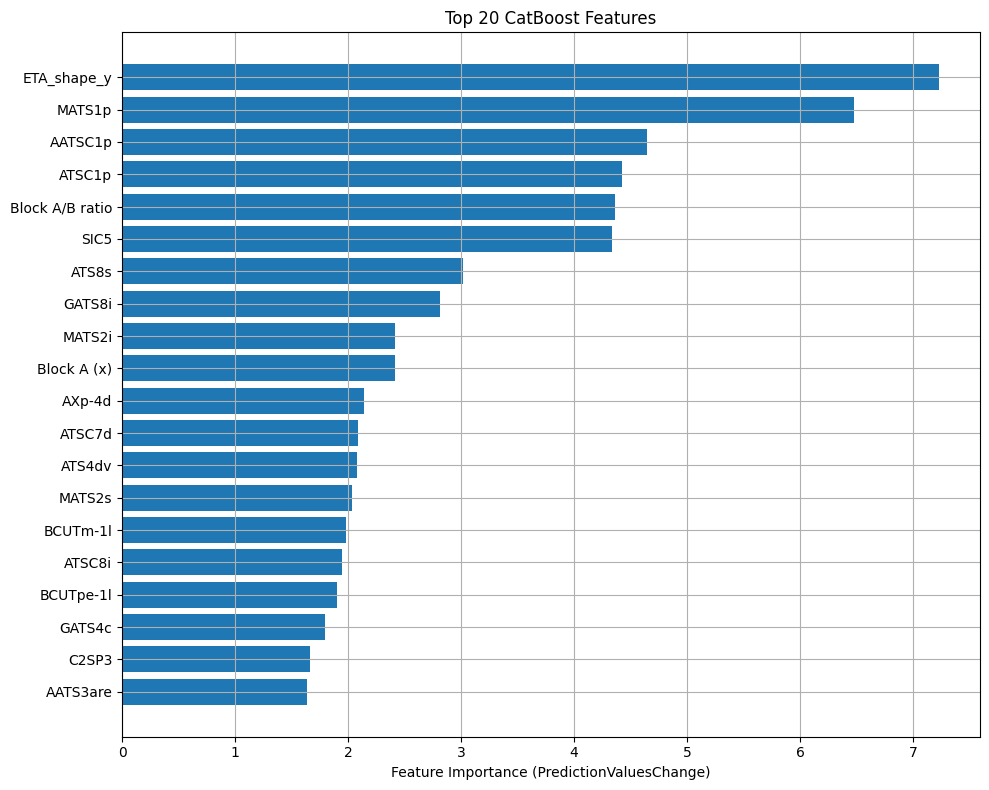

In [26]:
from catboost import Pool
import matplotlib.pyplot as plt
import pandas as pd

X_test_aligned = X_test[X_train.columns]
feature_names = X_test_aligned.columns.tolist()
pool = Pool(X_test_aligned, y_test, feature_names=feature_names)

# Use valid CatBoost importance type
importances = best_catboost_model.get_feature_importance(pool, type='PredictionValuesChange')

perm_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(perm_df['feature'][:20][::-1], perm_df['importance'][:20][::-1])
plt.xlabel("Feature Importance (PredictionValuesChange)")
plt.title("Top 20 CatBoost Features")
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
# ✅ Best parameters found by Optuna
best_rf_model = RandomForestRegressor(
    n_estimators=872,
    max_depth=14,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=False,
    random_state=2023
)

# ✅ Train the final model
best_rf_model.fit(X_train, y_train)

# ✅ Predict on test set
y_pred = best_rf_model.predict(X_test)

# ✅ Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Final Evaluation with Best Parameters:")
print(f"Mean Squared Error: {mse:.10f}")
print(f"R² Score: {r2:.5f}")


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values